                         Epicurious - Recipes with Rating and Nutrition Analysis


In [ ]:
# Importing Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [ ]:
# Loading the  Data
df_1 = pd.read_csv("/epi_r.csv")
df_2 = pd.read_json("/full_format_recipes.json")

In [ ]:
# Shape of the data
print(df_1.shape,df_2.shape)

(20052, 680) (20130, 11)


In [ ]:
print(df_1.head())

                                         title  rating  calories  protein  \
0              Lentil, Apple, and Turkey Wrap    2.500     426.0     30.0   
1  Boudin Blanc Terrine with Red Onion Confit    4.375     403.0     18.0   
2                Potato and Fennel Soup Hodge    3.750     165.0      6.0   
3             Mahi-Mahi in Tomato Olive Sauce    5.000       NaN      NaN   
4                    Spinach Noodle Casserole    3.125     547.0     20.0   

    fat  sodium  #cakeweek  #wasteless  22-minute meals  3-ingredient recipes  \
0   7.0   559.0        0.0         0.0              0.0                   0.0   
1  23.0  1439.0        0.0         0.0              0.0                   0.0   
2   7.0   165.0        0.0         0.0              0.0                   0.0   
3   NaN     NaN        0.0         0.0              0.0                   0.0   
4  32.0   452.0        0.0         0.0              0.0                   0.0   

   ...  yellow squash  yogurt  yonkers  yuca  zucc

In [ ]:
print(df_2.head())

                                          directions   fat  \
0  [1. Place the stock, lentils, celery, carrot, ...   7.0   
1  [Combine first 9 ingredients in heavy medium s...  23.0   
2  [In a large heavy saucepan cook diced fennel a...   7.0   
3  [Heat oil in heavy large skillet over medium-h...   NaN   
4  [Preheat oven to 350°F. Lightly grease 8x8x2-i...  32.0   

                       date  \
0 2006-09-01 04:00:00+00:00   
1 2004-08-20 04:00:00+00:00   
2 2004-08-20 04:00:00+00:00   
3 2009-03-27 04:00:00+00:00   
4 2004-08-20 04:00:00+00:00   

                                          categories  calories  \
0  [Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...     426.0   
1  [Food Processor, Onion, Pork, Bake, Bastille D...     403.0   
2  [Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...     165.0   
3  [Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...       NaN   
4  [Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...     547.0   

                                           

In [ ]:
print(df_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20130 entries, 0 to 20129
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   directions   20111 non-null  object             
 1   fat          15908 non-null  float64            
 2   date         20111 non-null  datetime64[ns, UTC]
 3   categories   20111 non-null  object             
 4   calories     15976 non-null  float64            
 5   desc         13495 non-null  object             
 6   protein      15929 non-null  float64            
 7   rating       20100 non-null  float64            
 8   title        20111 non-null  object             
 9   ingredients  20111 non-null  object             
 10  sodium       15974 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(5), object(5)
memory usage: 1.7+ MB
None


In [ ]:
epicurious_calories_sodium_df = df_1[["calories","sodium","fat","dessert"]]
epicurious_calories_sodium_df.head()

,calories,sodium,fat,dessert
0,426.0,559.0,7.0,0.0
1,403.0,1439.0,23.0,0.0
2,165.0,165.0,7.0,0.0
3,NaN,NaN,NaN,0.0
4,547.0,452.0,32.0,0.0


In [ ]:
epicurious_calories_sodium_df.dtypes

,0
calories,float64
sodium,float64
fat,float64
dessert,float64


In [ ]:
epicurious_calories_sodium_df.isnull().sum()

,0
calories,4117
sodium,4119
fat,4183
dessert,0


In [ ]:
epicurious_calories_sodium_df = epicurious_calories_sodium_df.dropna()
print(epicurious_calories_sodium_df.shape)
print(epicurious_calories_sodium_df.isnull().sum())
epicurious_calories_sodium_df.head()

(15867, 4)
calories    0
sodium      0
fat         0
dessert     0
dtype: int64


,calories,sodium,fat,dessert
0,426.0,559.0,7.0,0.0
1,403.0,1439.0,23.0,0.0
2,165.0,165.0,7.0,0.0
4,547.0,452.0,32.0,0.0
5,948.0,1042.0,79.0,0.0


In [ ]:
# Imputing missing values with mean
df_1["calories"] = df_1["calories"].fillna(df_1["calories"].mean())
df_1["protein"] = df_1["protein"].fillna(df_1["protein"].mean())
df_1["fat"] = df_1["fat"].fillna(df_1["fat"].mean())
df_1["sodium"] = df_1["sodium"].fillna(df_1["sodium"].mean())

Exploratory Data Analysis

In [ ]:

# Describe the DataFrame
print(df_1.describe())

             rating      calories        protein           fat        sodium  \
count  20052.000000  2.005200e+04   20052.000000  2.005200e+04  2.005200e+04   
mean       3.714467  6.322958e+03     100.160793  3.468775e+02  6.225975e+03   
std        1.340829  3.200697e+05    3418.593885  1.819768e+04  2.971161e+05   
min        0.000000  0.000000e+00       0.000000  0.000000e+00  0.000000e+00   
25%        3.750000  2.290000e+02       4.000000  1.000000e+01  1.230000e+02   
50%        4.375000  4.450000e+02      15.000000  2.400000e+01  4.665000e+02   
75%        4.375000  1.240000e+03      73.000000  8.200000e+01  1.914500e+03   
max        5.000000  3.011122e+07  236489.000000  1.722763e+06  2.767511e+07   

          #cakeweek    #wasteless  22-minute meals  3-ingredient recipes  \
count  20052.000000  20052.000000     20052.000000          20052.000000   
mean       0.000299      0.000050         0.000848              0.001346   
std        0.017296      0.007062         0.029105 

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, 'Calories')

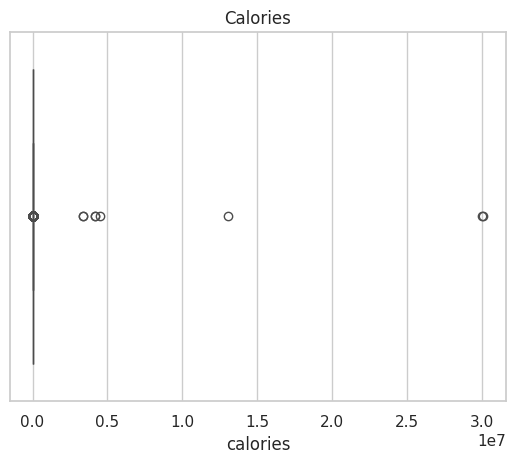

In [ ]:
sns.boxplot(x=epicurious_calories_sodium_df.calories).set_title("Calories")


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, 'Sodium')

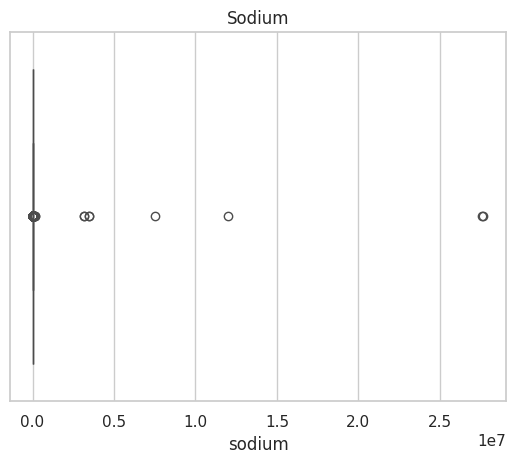

In [ ]:
sns.boxplot(x=epicurious_calories_sodium_df.sodium).set_title("Sodium")


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, 'Fat')

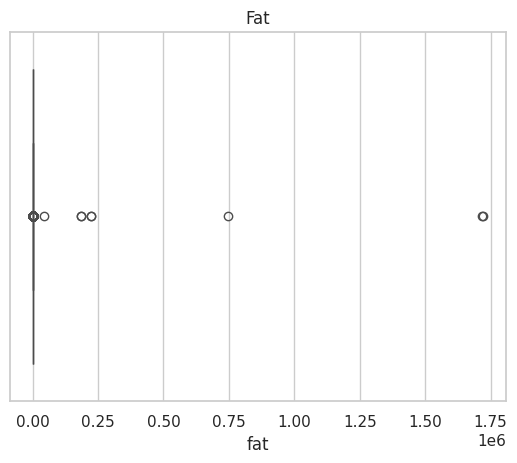

In [ ]:
sns.boxplot(x=epicurious_calories_sodium_df.fat).set_title("Fat")


Text(0.5, 1.0, 'Dessert')

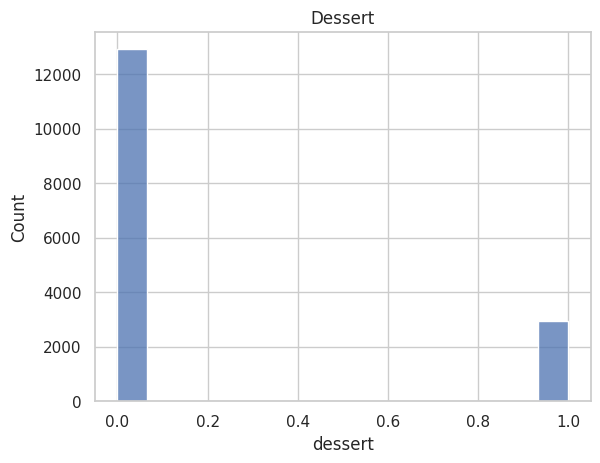

In [ ]:
sns.histplot(x=epicurious_calories_sodium_df.dessert).set_title("Dessert")

Text(0.5, 1.0, 'rating')

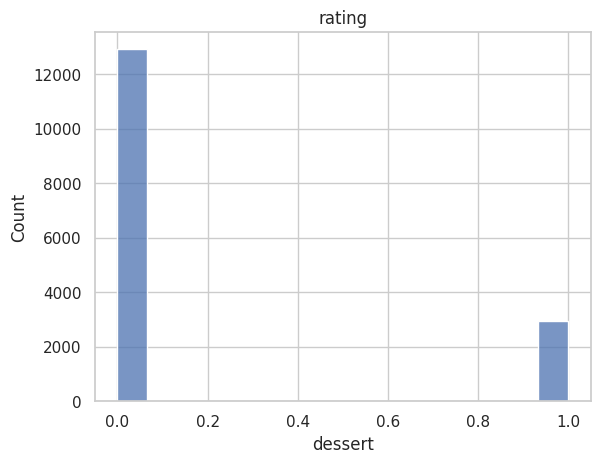

In [ ]:
sns.histplot(x=epicurious_calories_sodium_df.dessert).set_title("rating")

In [ ]:
epicurious_calories_sodium_df = epicurious_calories_sodium_df.loc[
                                                                  (epicurious_calories_sodium_df.calories<10000)&\
                                                                  (epicurious_calories_sodium_df.sodium<10000)]
epicurious_calories_sodium_df.isna().sum()

,0
calories,0
sodium,0
fat,0
dessert,0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, 'Calories')

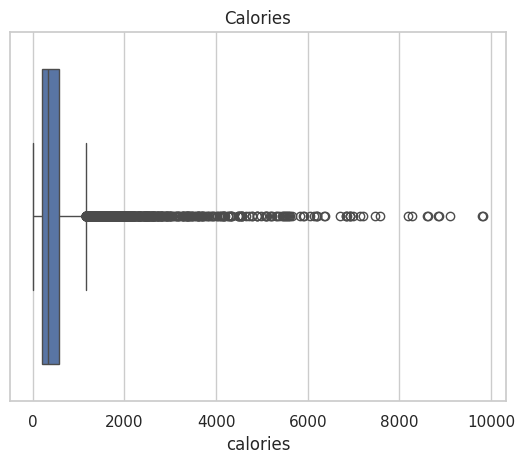

In [ ]:
sns.boxplot(x=epicurious_calories_sodium_df.calories).set_title("Calories")

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, 'Sodium')

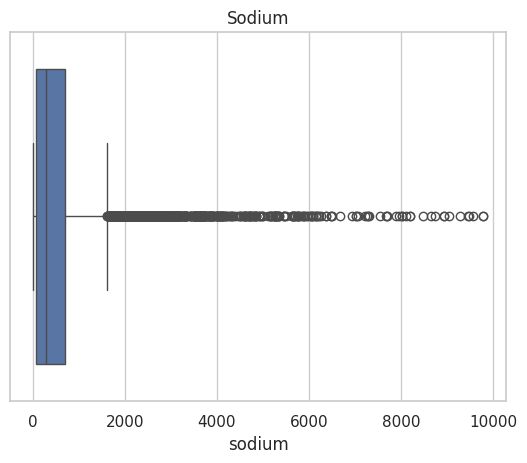

In [ ]:
sns.boxplot(x=epicurious_calories_sodium_df.sodium).set_title("Sodium")

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, 'Fat')

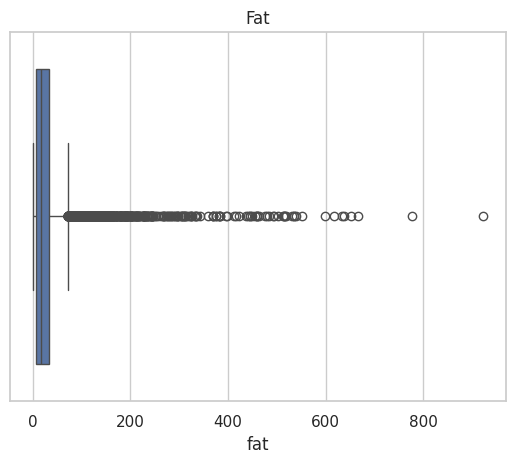

In [ ]:
sns.boxplot(x=epicurious_calories_sodium_df.fat).set_title("Fat")

Text(0.5, 1.0, 'Dessert')

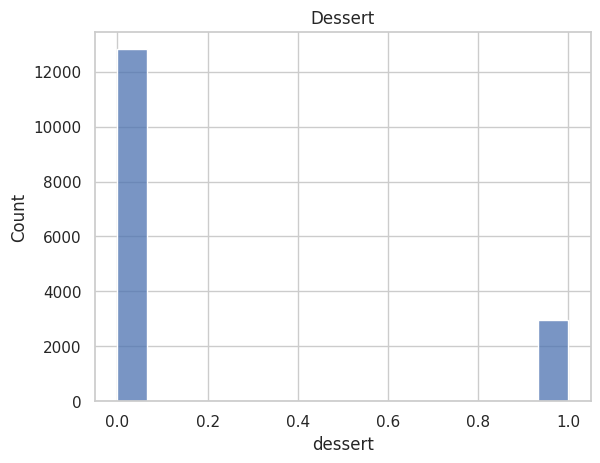

In [ ]:
sns.histplot(x=epicurious_calories_sodium_df.dessert).set_title("Dessert")

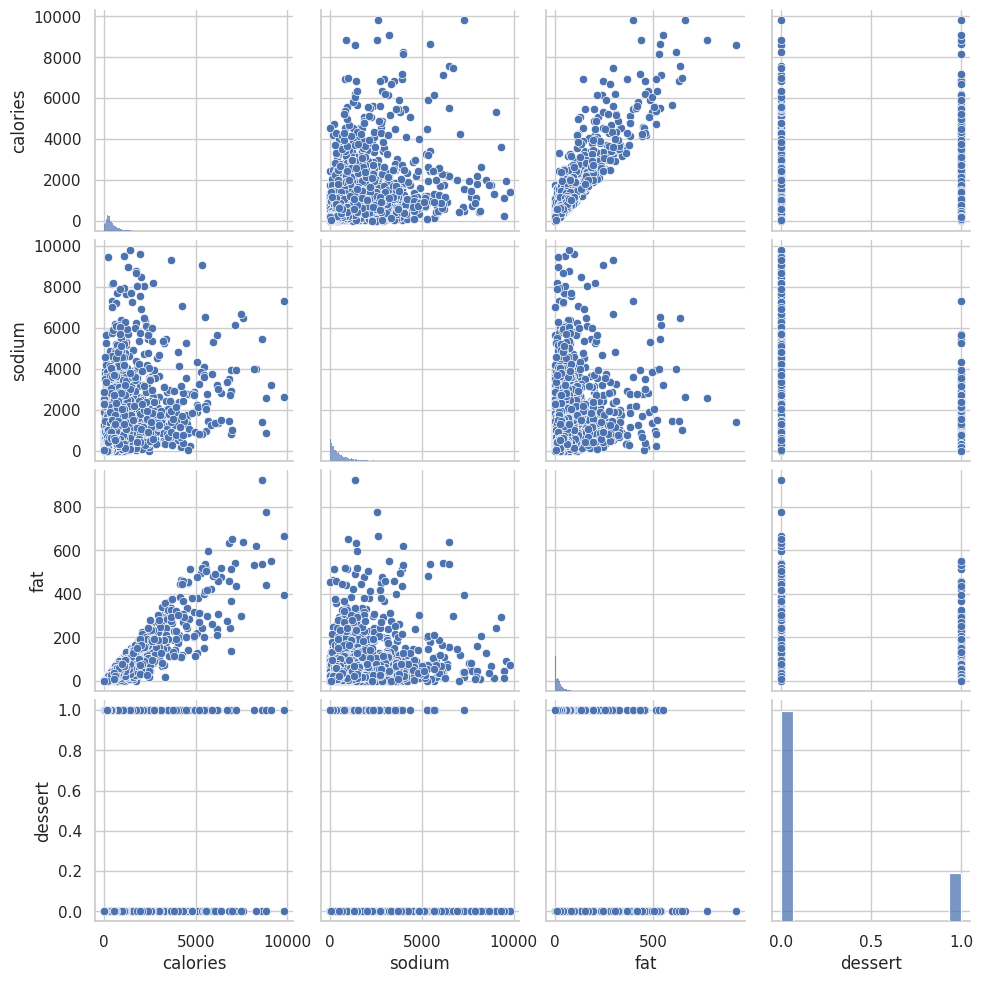

In [ ]:
sns.pairplot(data=epicurious_calories_sodium_df)

In [ ]:
df_3= df_2[["directions","categories","title","ingredients","date"]]
df_3 = df_3.dropna(subset=["title"])
# Access the column containing lists
lists_column = df_3['ingredients']

# Get the length of each list
lengths = [len(lst) for lst in lists_column]

# Create a new column containing the lengths
df_3['ingredient_length'] = lengths

print(df_3.head())

                                          directions  \
0  [1. Place the stock, lentils, celery, carrot, ...   
1  [Combine first 9 ingredients in heavy medium s...   
2  [In a large heavy saucepan cook diced fennel a...   
3  [Heat oil in heavy large skillet over medium-h...   
4  [Preheat oven to 350°F. Lightly grease 8x8x2-i...   

                                          categories  \
0  [Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...   
1  [Food Processor, Onion, Pork, Bake, Bastille D...   
2  [Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...   
3  [Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...   
4  [Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...   

                                         title  \
0              Lentil, Apple, and Turkey Wrap    
1  Boudin Blanc Terrine with Red Onion Confit    
2                Potato and Fennel Soup Hodge    
3             Mahi-Mahi in Tomato Olive Sauce    
4                    Spinach Noodle Casserole    

                         

In [ ]:
# Function to extract time from the directions
def extract_times(directions):
    # Ensure directions is a string (join if it's a list)
    if isinstance(directions, list):
        directions = ' '.join(directions)  # Join list into a single string
    # Find all instances of time expressions in the format "X minutes" or "X hour"
    time_pattern = r'(\d+)\s*(minutes?|hours?)'
    times = re.findall(time_pattern, directions, flags=re.IGNORECASE)

    # Convert times to total minutes
    total_minutes = 0
    for amount, unit in times:
        amount = int(amount)
        if 'hour' in unit:
            total_minutes += amount * 60  # Convert hours to minutes
        else:
            total_minutes += amount  # Already in minutes

    return total_minutes

# Apply the function to extract cooking times from the directions
df_3['prep_time'] = df_3['directions'].apply(extract_times)

# Check the results
print(df_3[['directions', 'prep_time']].head(70))

                                           directions  prep_time
0   [1. Place the stock, lentils, celery, carrot, ...         30
1   [Combine first 9 ingredients in heavy medium s...        177
2   [In a large heavy saucepan cook diced fennel a...         40
3   [Heat oil in heavy large skillet over medium-h...         22
4   [Preheat oven to 350°F. Lightly grease 8x8x2-i...         55
..                                                ...        ...
65  [Preheat oven to 350°F. Butter three 9-inch-di...         38
66  [Grind the parsley, sage, rosemary, and thyme ...         31
67  [Combine the vinegar, garlic, mustard, and ore...          0
68  [Blend first 4 ingredients in processor until ...        540
69  [1 Heat the olive oil in a 3- or 4-quart sauce...         24

[70 rows x 2 columns]


In [ ]:
# Extract year,month and day from date column
df_3["year"] = df_3["date"].dt.year
df_3["month"] = df_3["date"].dt.month
df_3["day"] = df_3["date"].dt.day
# Merge the two dataframe on title(Inner Join).
df = pd.merge(df_1,df_3[["title","ingredient_length","prep_time","day","month","year"]],on="title",how = "inner")
print(df.head())

                                         title  rating     calories  \
0              Lentil, Apple, and Turkey Wrap    2.500   426.000000   
1  Boudin Blanc Terrine with Red Onion Confit    4.375   403.000000   
2                Potato and Fennel Soup Hodge    3.750   165.000000   
3             Mahi-Mahi in Tomato Olive Sauce    5.000  6322.958017   
4                    Spinach Noodle Casserole    3.125   547.000000   

      protein         fat       sodium  #cakeweek  #wasteless  \
0   30.000000    7.000000   559.000000        0.0         0.0   
1   18.000000   23.000000  1439.000000        0.0         0.0   
2    6.000000    7.000000   165.000000        0.0         0.0   
3  100.160793  346.877497  6225.974895        0.0         0.0   
4   20.000000   32.000000   452.000000        0.0         0.0   

   22-minute meals  3-ingredient recipes  ...  cookbooks  leftovers  snack  \
0              0.0                   0.0  ...        0.0        0.0    0.0   
1              0.0        

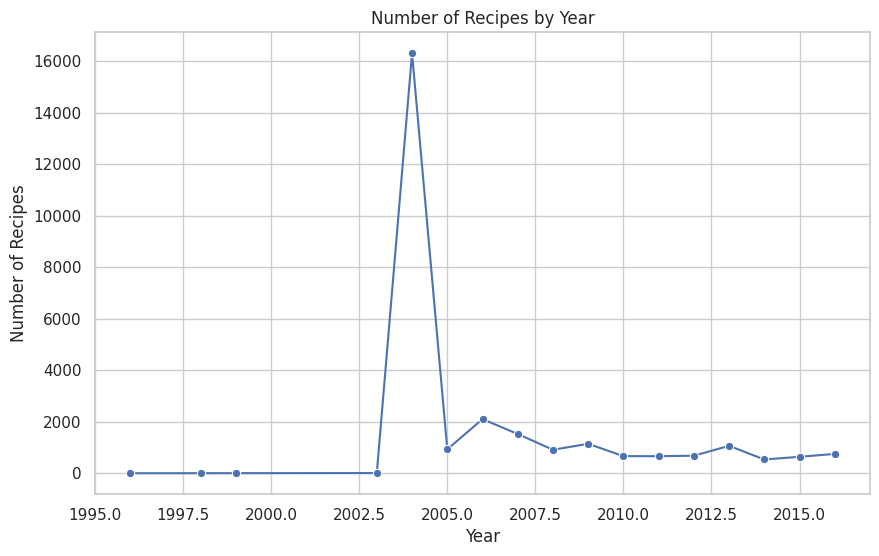

In [ ]:
# Count the number of recipes per year
recipes_per_year = df.groupby('year').size()
plt.figure(figsize=(10, 6))
sns.lineplot(x=recipes_per_year.index, y=recipes_per_year.values, marker='o', color='b')
plt.title('Number of Recipes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Recipes')
plt.grid(True)
plt.show()

Observations:
Maximum recipe is published betweem the year 2002 to 2005.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

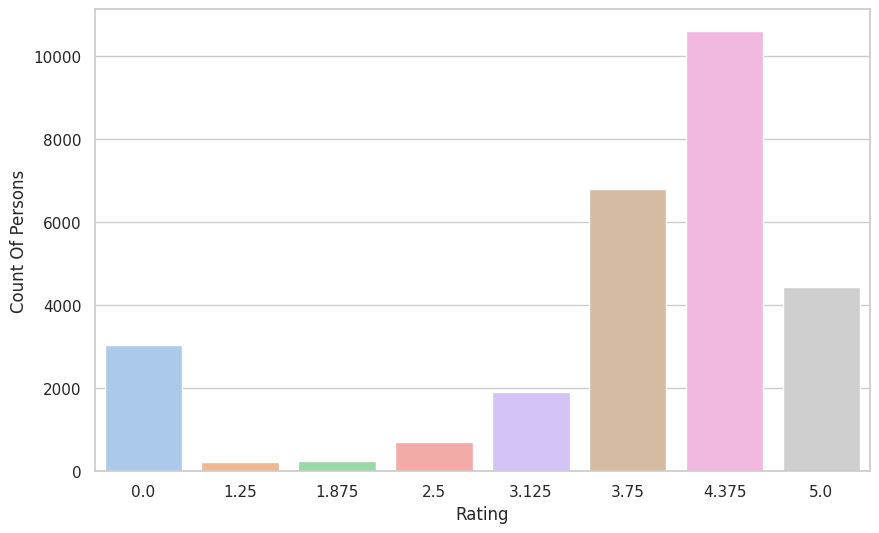

In [ ]:
# Countplot for Rating Columns
plt.figure(figsize=(10, 6))
sns.countplot(x= "rating",data = df,palette='pastel',hue = "rating",legend = False)
plt.xlabel("Rating")
plt.ylabel("Count Of Persons")
plt.show()

Observations:
This plot shows that maximum person gave a rating of 4.375, followed by the ratings 3.75 and 5.0 .

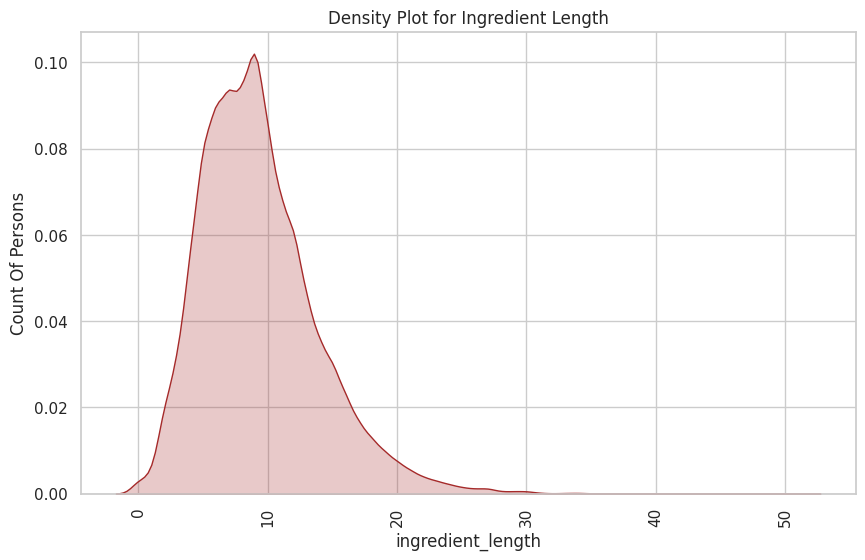

In [ ]:
# Density Plot for Ingredient Length
plt.figure(figsize=(10,6))
sns.kdeplot(x= "ingredient_length",data = df,fill = True, color='brown')
plt.xlabel("ingredient_length")
plt.title('Density Plot for Ingredient Length')
plt.ylabel("Count Of Persons")
plt.tick_params(axis='x', rotation=90)
plt.show()

Observations:
This is a density plot for ingredient length.
The plot is normally distributed but shows a little spike at the end.

<Figure size 1000x600 with 0 Axes>

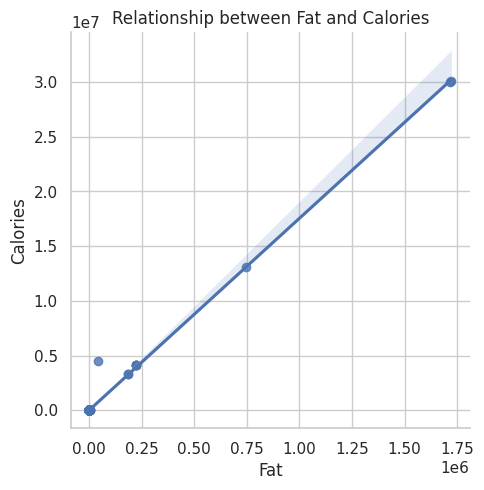

In [ ]:
# Scatter Plot for Calories and Fat
plt.figure(figsize=(10, 6))
sns.lmplot(x="fat", y="calories", data=df)
plt.xlabel("Fat")
plt.ylabel("Calories")
plt.title("Relationship between Fat and Calories")
plt.show()

Observations:
This graph shows a linear relation between Calories and Protein.

<Figure size 1000x600 with 0 Axes>

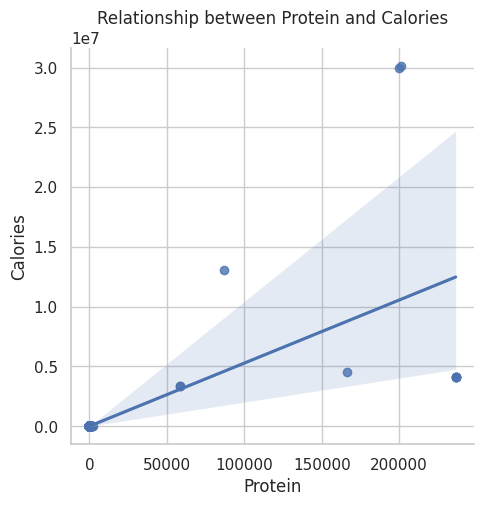

In [ ]:
# Relationship between Protein and Calories
plt.figure(figsize=(10, 6))
sns.lmplot(x="protein", y="calories", data=df)
plt.xlabel("Protein")
plt.ylabel("Calories")
plt.title("Relationship between Protein and Calories")
plt.show()

<Figure size 1000x600 with 0 Axes>

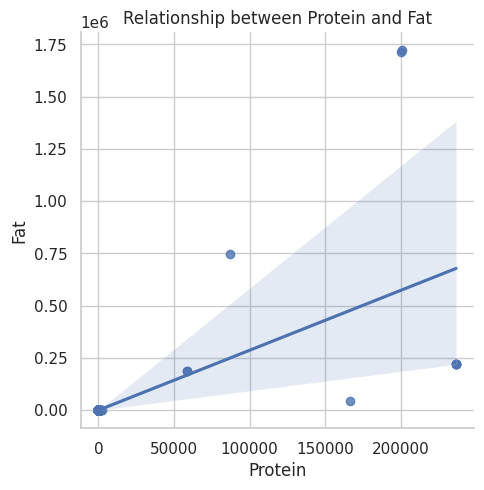

In [ ]:
# Relationship between Protein and Fat
plt.figure(figsize=(10, 6))
sns.lmplot(x="protein", y="fat", data=df)
plt.xlabel("Protein")
plt.ylabel("Fat")
plt.title("Relationship between Protein and Fat")
plt.show()

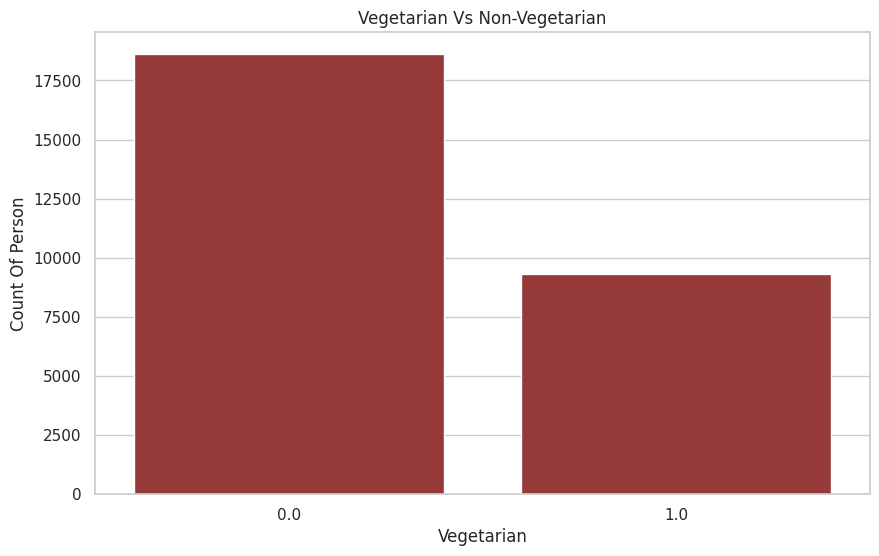

In [ ]:
# Count plot for Vegetarian and Non Vegetarian
plt.figure(figsize=(10, 6))
sns.countplot(x=df["vegetarian"],color = "brown")
plt.xlabel("Vegetarian")
plt.ylabel("Count Of Person")
plt.title('Vegetarian Vs Non-Vegetarian')
plt.show()

Observations:
This is a countplot for vegetarian and Non-vegetarian.
We can observe that most of the persons are Non-vegetarian.

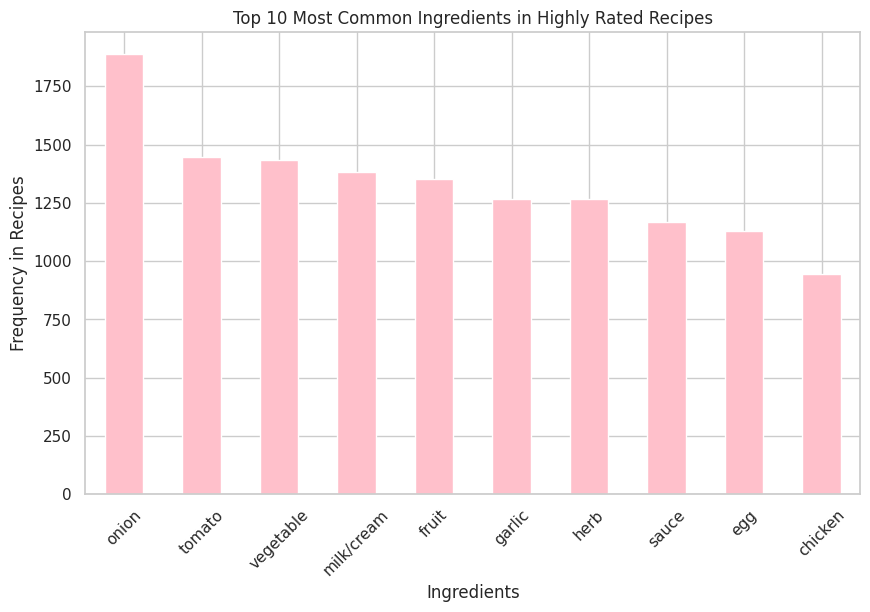

In [ ]:
# List of ingredient columns (assuming they are all ingredient columns)
ingredient_columns = [
    'butter', 'tomato', 'garlic', 'onion', 'olive', 'chicken', 'egg',
    'milk/cream', 'herb', 'fruit', 'sauce', 'spice', 'bread', 'cheese', 'bacon', 'basil',
    'almond', 'bean', 'pepper', 'apple', 'cake', 'mustard', 'mint', 'parsley', 'vinegar',
    'shrimp', 'walnut', 'cranberry', 'potato', 'fish', 'turkey', 'carrot', 'beef', 'mushroom',
    'pork', 'pasta', 'lemon', 'ginger', 'lime', 'chocolate', 'nut', 'parmesan', 'cream cheese',
    'celery', 'cilantro', 'eggplant', 'rice', 'broccoli', 'spinach','vegetable'
]
# Filter highly rated recipes (e.g., rating >= 4)
highly_rated_recipes = df[df['rating'] >= 4]

# Sum the values for each ingredient in highly rated recipes
ingredient_sums = highly_rated_recipes[ingredient_columns].sum()

# Sort the ingredients by their frequency in descending order
sorted_ingredients = ingredient_sums.sort_values(ascending=False)

# Get the top 10 most common ingredients
top_10_ingredients = sorted_ingredients.head(10)

# Plot a bar chart for the top 10 most common ingredients
plt.figure(figsize=(10, 6))
top_10_ingredients.plot(kind='bar', color='pink')
plt.title('Top 10 Most Common Ingredients in Highly Rated Recipes')
plt.xlabel('Ingredients')
plt.ylabel('Frequency in Recipes')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

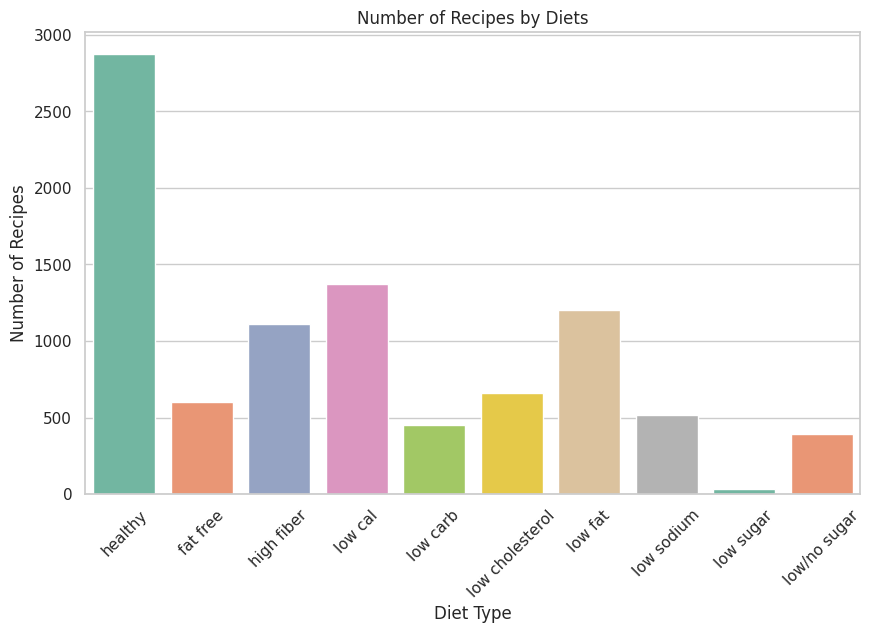

In [ ]:
# Plot a bar chart for Number of Recipes by Diets
diet_type = ['healthy','fat free','high fiber','low cal','low carb','low cholesterol','low fat','low sodium','low sugar','low/no sugar']
diet_counts = df[diet_type].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=diet_counts.index, y=diet_counts.values, hue=diet_counts.index,palette='Set2', legend = False )
plt.title('Number of Recipes by Diets')
plt.xlabel('Diet Type')
plt.ylabel('Number of Recipes')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

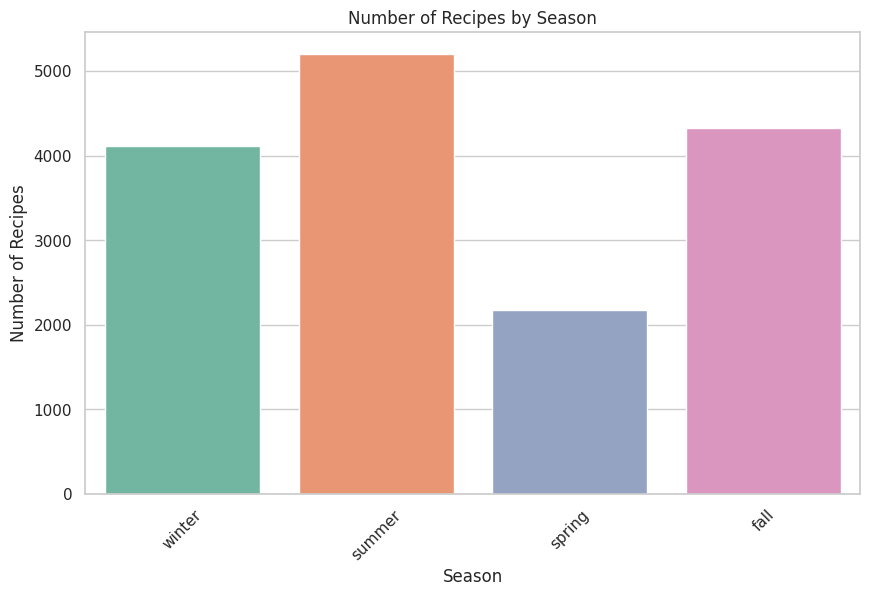

In [ ]:
# Countplot for Season
plt.figure(figsize=(10, 6))
season = ["winter","summer","spring","fall"]
season_counts = df[season].sum()
sns.barplot(x=season_counts.index, y=season_counts.values, hue=season_counts.index,palette='Set2', legend = False )
plt.title('Number of Recipes by Season')
plt.xlabel('Season')
plt.ylabel('Number of Recipes')
plt.xticks(rotation=45)
plt.show()

Observations:
This is a bar plot for number of recipe per season.
We can observe that most of the recipe are cooked during Summer, winter and Fall.

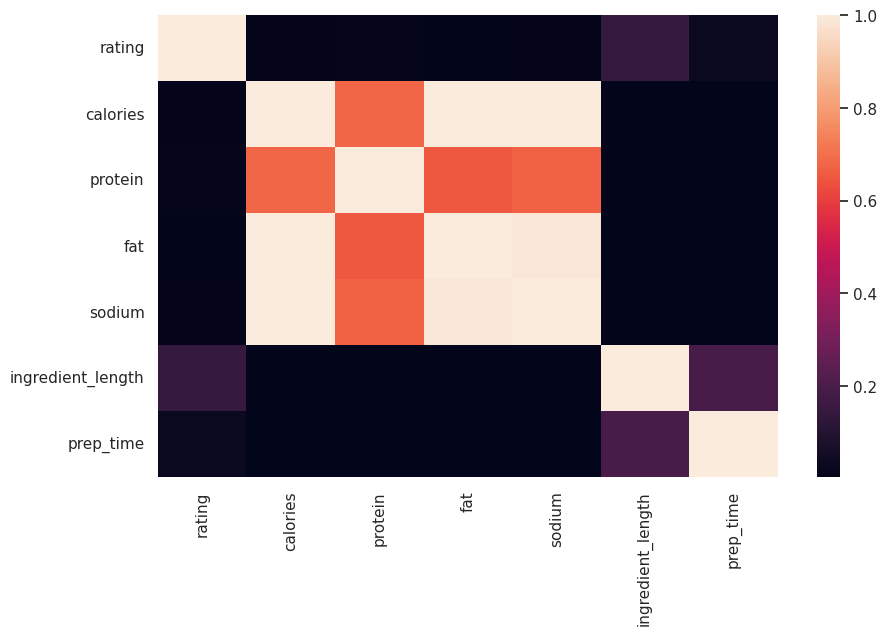

In [ ]:
# Heatmap for finding correlation between the variables.
plt.figure(figsize=(10, 6))
sns.heatmap(df[columns_to_check].corr())
plt.show()

Observations:
This is a heatmap which shows correlation between numerical columns.
We can observe that calories,protein,fat and sodium are highly correlated with each other.